In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [4]:
Ast_data = pd.read_csv(r"NE_OBJ.csv", header=0)

# Copy the data to back-up file

NE_OBJ1 = Ast_data.copy()

# Display first five records

Ast_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


In [5]:
Ast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
Ast_data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [7]:
# Displaying Duplicate values with in dataset

BMCdata_dup = Ast_data[Ast_data.duplicated(keep='last')]
BMCdata_dup

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous


In [8]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Ast_data['name'] = LE.fit_transform(Ast_data[['name']])

In [9]:
Ast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  int32  
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [10]:
del Ast_data['orbiting_body']

In [11]:
Ast_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,2162635,24991,1.198271,2.679415,13569.24922,54839744.08,False,16.73,False
1,2277475,25414,0.265800,0.594347,73588.72666,61438126.52,False,20.00,True
2,2512244,26799,0.722030,1.614507,114258.69210,49798724.94,False,17.83,False
3,3596030,5505,0.096506,0.215794,24764.30314,25434972.72,False,22.20,False
4,3667127,7518,0.255009,0.570217,42737.73376,46275567.00,False,20.09,True


In [12]:
# Display the data by variables wise

for i in Ast_data.columns:
    print(Ast_data[i].value_counts())

2469219    43
2277810    43
3743123    40
2138175    39
3893865    38
           ..
3768019     1
3774692     1
3779049     1
3775040     1
3092229     1
Name: id, Length: 27423, dtype: int64
26436    43
25418    43
10200    40
24768    39
17743    38
         ..
12017     1
12511     1
12672     1
12514     1
96        1
Name: name, Length: 27423, dtype: int64
0.035039    1130
0.029144    1058
0.023150     995
0.031956     988
0.022108     977
            ... 
0.008912       1
1.623884       1
0.108882       1
0.059587       1
0.109133       1
Name: est_diameter_min, Length: 1638, dtype: int64
0.078350    1130
0.065169    1058
0.051765     995
0.071456     988
0.049436     977
            ... 
0.019927       1
3.631115       1
0.243467       1
0.133242       1
0.244028       1
Name: est_diameter_max, Length: 1638, dtype: int64
28603.59041     2
101704.47440    2
17941.55425     2
46304.12573     2
66082.37374     2
               ..
67452.93222     1
108011.89560    1
56132.12458     

In [13]:
# Display unique values counts for each variable

Ast_data.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90785
miss_distance         90536
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [14]:
# Use LabelBinarizer for target variables

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

Ast_data['sentry_object'] = LB.fit_transform(Ast_data['sentry_object'])
Ast_data['hazardous'] = LB.fit_transform(Ast_data['hazardous'])

In [15]:
Ast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  int32  
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   sentry_object       90836 non-null  int32  
 7   absolute_magnitude  90836 non-null  float64
 8   hazardous           90836 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 5.2 MB


In [16]:
Ast_data['hazardous'].value_counts(sort=False)

0    81996
1     8840
Name: hazardous, dtype: int64

In [17]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

BMCdata_count = Ast_data.hazardous.value_counts()
print('Class 0:', BMCdata_count[0])
print('Class 1:', BMCdata_count[1])
print('Proportion:', round(BMCdata_count[0] / BMCdata_count[1], 2), ': 1')
print('Total CC Trans:', len(Ast_data))

Class 0: 81996
Class 1: 8840
Proportion: 9.28 : 1
Total CC Trans: 90836


In [18]:
# Identify the independent and Target variables

IndepVar = []
for col in Ast_data.columns:
    if col != 'hazardous':
        IndepVar.append(col)

TargetVar ='hazardous'

x = Ast_data[IndepVar]
y = Ast_data[TargetVar]

In [19]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((63585, 8), (27251, 8), (63585,), (27251,))

In [20]:
Ast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  int32  
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   sentry_object       90836 non-null  int32  
 7   absolute_magnitude  90836 non-null  float64
 8   hazardous           90836 non-null  int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 5.2 MB


In [21]:
cols=['id','name','est_diameter_min','est_diameter_max','relative_velocity','miss_distance','sentry_object','absolute_magnitude']

In [22]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [23]:
# Load the Hyperparameter tunining result dataset

Results = pd.read_csv(r"HTResults .csv", header=0)
Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [24]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  306  2348]
 [  546 24051]]
Outcome values : 
 306 2348 546 24051
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.12      0.17      2654
           0       0.91      0.98      0.94     24597

    accuracy                           0.89     27251
   macro avg       0.64      0.55      0.56     27251
weighted avg       0.86      0.89      0.87     27251

Accuracy : 89.4 %
Precision : 35.9 %
Recall : 11.5 %
F1 Score : 0.175
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 54.6 %
MCC : 0.159
roc_auc_score: 0.547


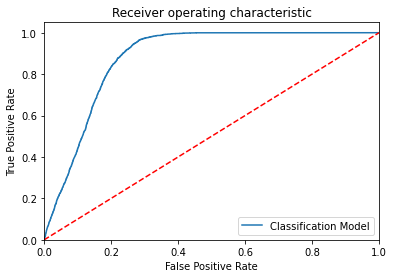

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1166  1488]
 [ 2608 21989]]
Outcome values : 
 1166 1488 2608 21989
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.44      0.36      2654
           0       0.94      0.89      0.91     24597

    accuracy                           0.85     27251
   macro avg       0.62      0.67      0.64     27251
weighted avg       0.88      0.85      0.86     27251

Accuracy : 85.0 %
Precision : 30.9 %
Recall : 43.9 %
F1 Score : 0.363
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 66.6 %
MCC : 0.286
roc_auc_score: 0.667


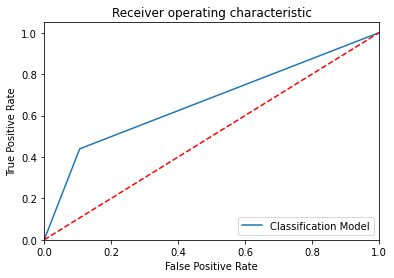

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  734  1920]
 [  763 23834]]
Outcome values : 
 734 1920 763 23834
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.28      0.35      2654
           0       0.93      0.97      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.71      0.62      0.65     27251
weighted avg       0.88      0.90      0.89     27251

Accuracy : 90.2 %
Precision : 49.0 %
Recall : 27.7 %
F1 Score : 0.354
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 62.3 %
MCC : 0.32
roc_auc_score: 0.623


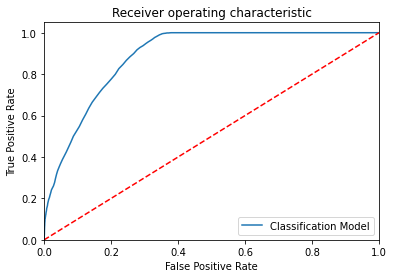

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  544  2110]
 [  416 24181]]
Outcome values : 
 544 2110 416 24181
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.20      0.30      2654
           0       0.92      0.98      0.95     24597

    accuracy                           0.91     27251
   macro avg       0.74      0.59      0.63     27251
weighted avg       0.89      0.91      0.89     27251

Accuracy : 90.7 %
Precision : 56.7 %
Recall : 20.5 %
F1 Score : 0.301
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 59.4 %
MCC : 0.302
roc_auc_score: 0.594


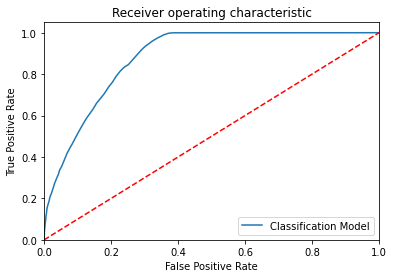

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  807  1847]
 [  941 23656]]
Outcome values : 
 807 1847 941 23656
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.30      0.37      2654
           0       0.93      0.96      0.94     24597

    accuracy                           0.90     27251
   macro avg       0.69      0.63      0.66     27251
weighted avg       0.88      0.90      0.89     27251

Accuracy : 89.8 %
Precision : 46.2 %
Recall : 30.4 %
F1 Score : 0.367
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 63.3 %
MCC : 0.322
roc_auc_score: 0.633


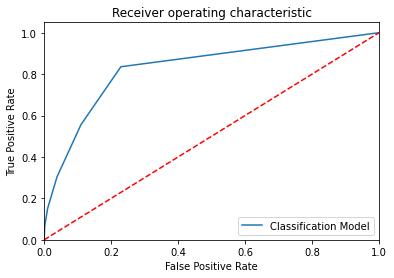

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[  185  2469]
 [   73 24524]]
Outcome values : 
 185 2469 73 24524
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.07      0.13      2654
           0       0.91      1.00      0.95     24597

    accuracy                           0.91     27251
   macro avg       0.81      0.53      0.54     27251
weighted avg       0.89      0.91      0.87     27251

Accuracy : 90.7 %
Precision : 71.7 %
Recall : 7.0 %
F1 Score : 0.127
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 53.4 %
MCC : 0.204
roc_auc_score: 0.533


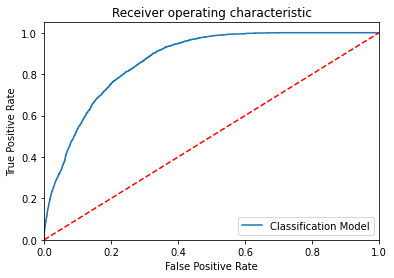

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  772  1882]
 [  781 23816]]
Outcome values : 
 772 1882 781 23816
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.29      0.37      2654
           0       0.93      0.97      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.71      0.63      0.66     27251
weighted avg       0.88      0.90      0.89     27251

Accuracy : 90.2 %
Precision : 49.7 %
Recall : 29.1 %
F1 Score : 0.367
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 63.0 %
MCC : 0.331
roc_auc_score: 0.63


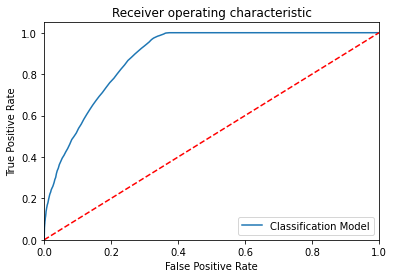

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[  488  2166]
 [  236 24361]]
Outcome values : 
 488 2166 236 24361
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.18      0.29      2654
           0       0.92      0.99      0.95     24597

    accuracy                           0.91     27251
   macro avg       0.80      0.59      0.62     27251
weighted avg       0.89      0.91      0.89     27251

Accuracy : 91.2 %
Precision : 67.4 %
Recall : 18.4 %
F1 Score : 0.289
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 58.7 %
MCC : 0.321
roc_auc_score: 0.587


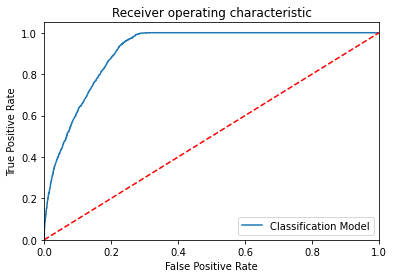

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  939  1715]
 [  946 23651]]
Outcome values : 
 939 1715 946 23651
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.35      0.41      2654
           0       0.93      0.96      0.95     24597

    accuracy                           0.90     27251
   macro avg       0.72      0.66      0.68     27251
weighted avg       0.89      0.90      0.89     27251

Accuracy : 90.2 %
Precision : 49.8 %
Recall : 35.4 %
F1 Score : 0.414
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 65.8 %
MCC : 0.368
roc_auc_score: 0.658


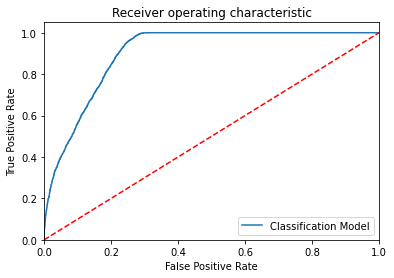

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1914   740]
 [ 4233 20364]]
Outcome values : 
 1914 740 4233 20364
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.72      0.43      2654
           0       0.96      0.83      0.89     24597

    accuracy                           0.82     27251
   macro avg       0.64      0.77      0.66     27251
weighted avg       0.90      0.82      0.85     27251

Accuracy : 81.8 %
Precision : 31.1 %
Recall : 72.1 %
F1 Score : 0.435
Specificity or True Negative Rate : 82.8 %
Balanced Accuracy : 77.4 %
MCC : 0.39
roc_auc_score: 0.775


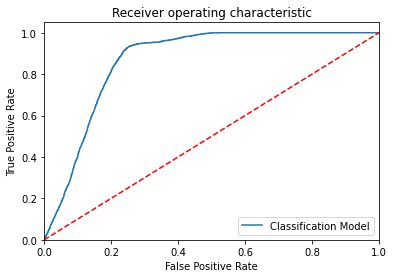

-----------------------------------------------------------------------------------------------------


In [25]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)

In [26]:
# Results with comparing the all the algorithms 

Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),306,2348,546,24051,0.894,0.359,0.115,0.175,0.978,0.159,0.54655,0.546
1,DecisionTreeClassifier(),1166,1488,2608,21989,0.85,0.309,0.439,0.363,0.894,0.286,0.666654,0.666
2,"(DecisionTreeClassifier(max_features='auto', r...",734,1920,763,23834,0.902,0.49,0.277,0.354,0.969,0.32,0.622772,0.623
3,"(ExtraTreeClassifier(random_state=1742103557),...",544,2110,416,24181,0.907,0.567,0.205,0.301,0.983,0.302,0.59403,0.594
4,KNeighborsClassifier(),807,1847,941,23656,0.898,0.462,0.304,0.367,0.962,0.322,0.632906,0.633
5,SVC(probability=True),185,2469,73,24524,0.907,0.717,0.07,0.127,0.997,0.204,0.533369,0.534
6,(DecisionTreeClassifier(random_state=209959389...,772,1882,781,23816,0.902,0.497,0.291,0.367,0.968,0.331,0.629565,0.63
7,([DecisionTreeRegressor(criterion='friedman_ms...,488,2166,236,24361,0.912,0.674,0.184,0.289,0.99,0.321,0.587139,0.587
8,LGBMClassifier(),939,1715,946,23651,0.902,0.498,0.354,0.414,0.962,0.368,0.657673,0.658
9,GaussianNB(),1914,740,4233,20364,0.818,0.311,0.721,0.435,0.828,0.39,0.774541,0.774
